CONSTRUCCIÓN DEL MODELO

In [ ]:

# VERSIÓN 01/07/2025
# VERSIÓN TRASLADADA AL DOCUMENTO DEL TFD

# Creando la red neuronal con Keras

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import math 
import matplotlib.pyplot as plt
import keras

# Leyendo el dataset

FILENAME = './DATOS_RED_NEURO_NUMERICO.csv'

# Fijando la semilla para poder reproducir resultados 

seed = 7
np.random.seed(seed)

# Cargando el dataset.
dataset = np.loadtxt(FILENAME, delimiter=",",skiprows=1 )

np.random.shuffle(dataset)

# Dividiendo el dataset entre características de entrada y de salida

filas = np.size(dataset,0)
columnas=np.size(dataset,1)
training_len= filas*0.99
training_len = math.trunc(training_len)

training_data = dataset[0:training_len, 0:197]
training_targets = dataset[0:training_len, 197:200]

#Se toma como prueba una porcion de los datos totales

pr_data = dataset[training_len+1: -1, 0:197]
pr_targets = dataset[training_len+1:-1, 197:200]

#  Creando el modelo:
#   Se utiliza la funcion de activacion 'relu' para la capa de entrada.
#   Se usa 'sigmoid' como función de activacion para la capa de salida, cuya salida
#   estará entre 0 y 1 el umbral entre la pertenencia a la clase de salida sera 0,5
#   La red se configurara con tres capas ocultas y una capa de salida

model = Sequential()
model.add(Dense(100, input_dim=197, kernel_initializer='uniform', activation='relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(3, kernel_initializer='uniform', activation='sigmoid'))

# Optimizacion ADAM

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Se entrena la red con 2000  iteraciones dividiendo el set de entrenamiento en
# Lotes de 1000 

historia=model.fit(training_data, training_targets, epochs=2000, batch_size=1000)

# Se evalua el modelo con los datos de prueba

scores = model.evaluate(pr_data, pr_targets)
print ("Evaluado:")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

# Se guarda el modelo

model.save('./back_red.keras')

2025-07-01 23:01:10.036879: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'\n\nmodel = Sequential()\nmodel.add(Dense(100, input_dim=197, kernel_initializer=\'uniform\', activation=\'relu\'))\nmodel.add(Dense(100, kernel_initializer=\'uniform\', activation=\'relu\'))\nmodel.add(Dense(100, kernel_initializer=\'uniform\', activation=\'relu\'))\nmodel.add(Dense(3, kernel_initializer=\'uniform\', activation=\'sigmoid\'))\n\nmodel.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\nhistoria=model.fit(training_data, training_targets, epochs=2000, batch_size=1000)\nscores = model.evaluate(pr_data, pr_targets)\nprint ("Evaluado:")\nprint("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))\nmodel.save(\'/Users/mac/Documents/python/back_red.keras\')\n\n'

GRAFICAS DEL PROCESO DE ENTRENAMIENTO DEL MODELO

dict_keys(['accuracy', 'loss'])
[0.10485970973968506, 1.0]


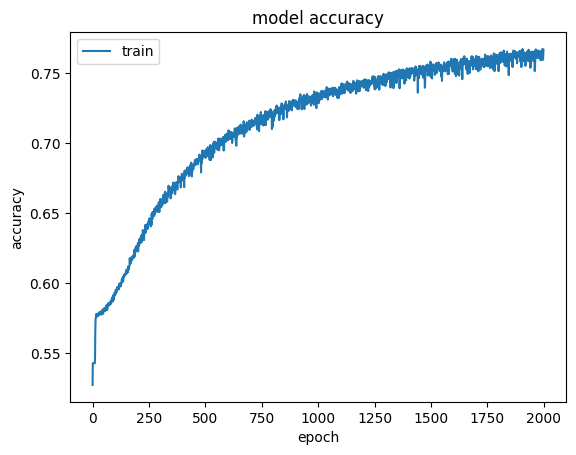

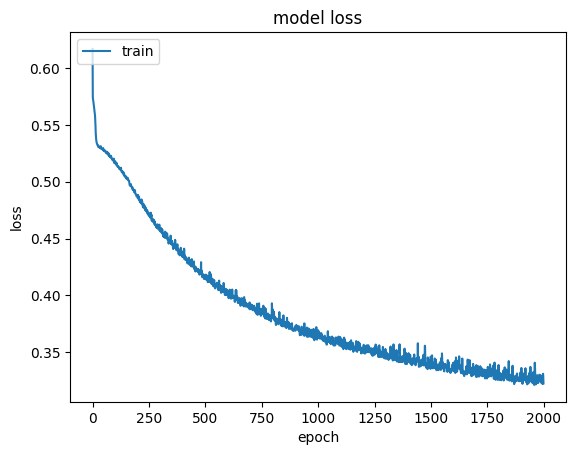

In [ ]:
# Graficas de desempeño del modelo

import matplotlib.pyplot as plt

print(historia.history.keys())
print(scores)

# Imprime la gráfica de history para la precisión 

plt.plot(historia.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Imprime la gráfica de history para el error

plt.plot(historia.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

PRUEBA DE UN CASO AISLADO

In [ ]:
# Prueba de un caso

scores = model.evaluate(pr_data[19:20,:], pr_data[19:20,:])
print ("Evaluado:")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
print (scores)

model.predict(pr_data[19:20,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 1.0000 - loss: 0.1049
Evaluado:
compile_metrics: 100.00%
[0.10485970973968506, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


array([[0.83394206, 0.06592226, 0.06273778]], dtype=float32)

RECARGA DE UN MODELO

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow

# Reconstruccion de un modelo guardado

reconstructed_model = keras.models.load_model('./back_red.keras')
